In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
path = r"/content/forestfires.csv"

In [ ]:
data = pd.read_csv(path)

In [ ]:
print(data.head())


  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  

In [ ]:
print(data.describe())

             FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653    0.295959    63.655818   

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

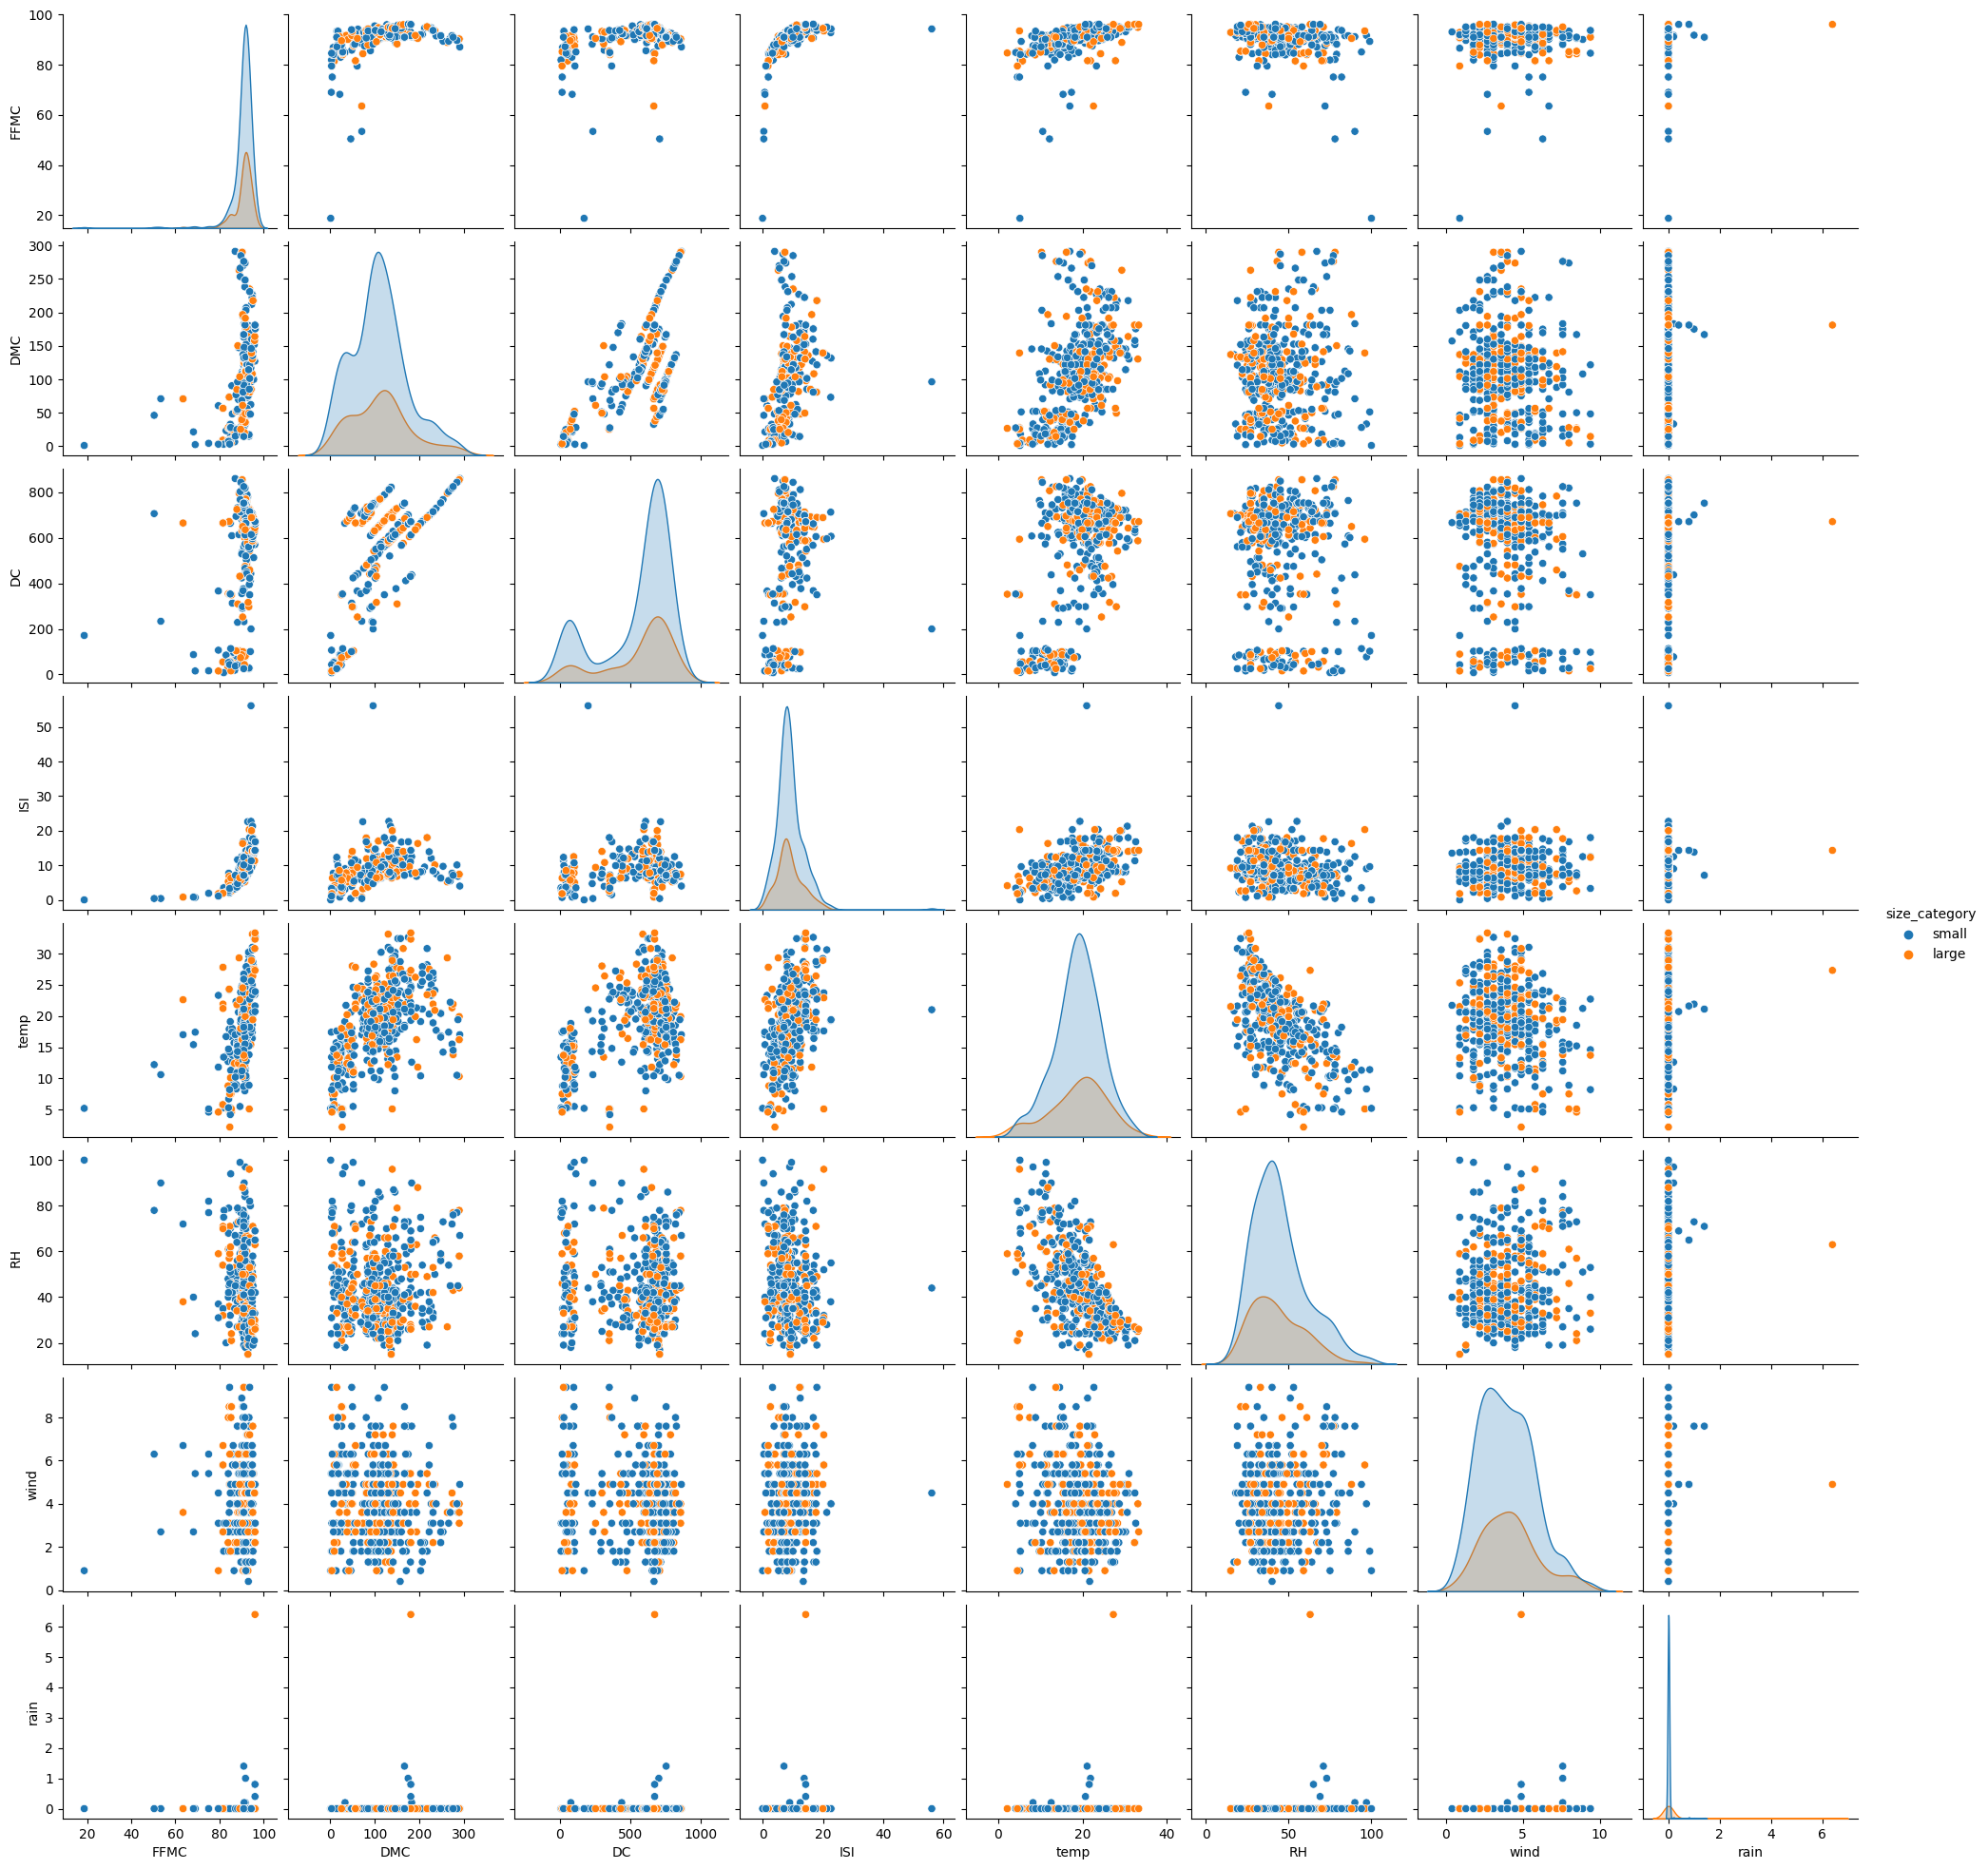

In [ ]:
sns.pairplot(data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'size_category']], hue='size_category', diag_kind='kde')
plt.show()


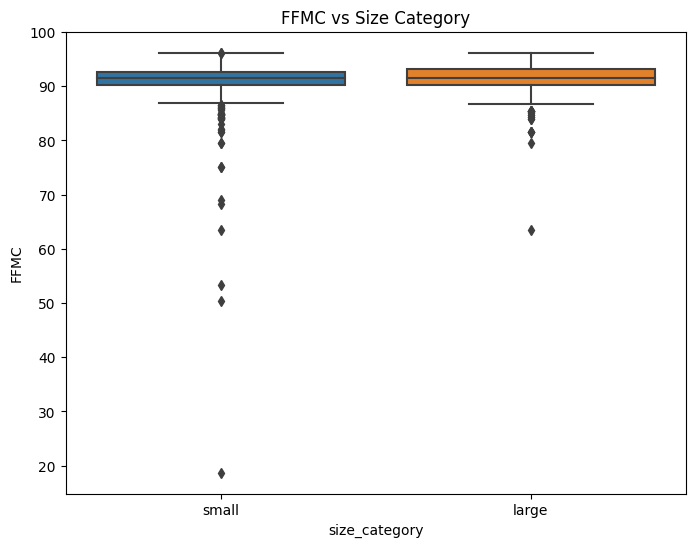

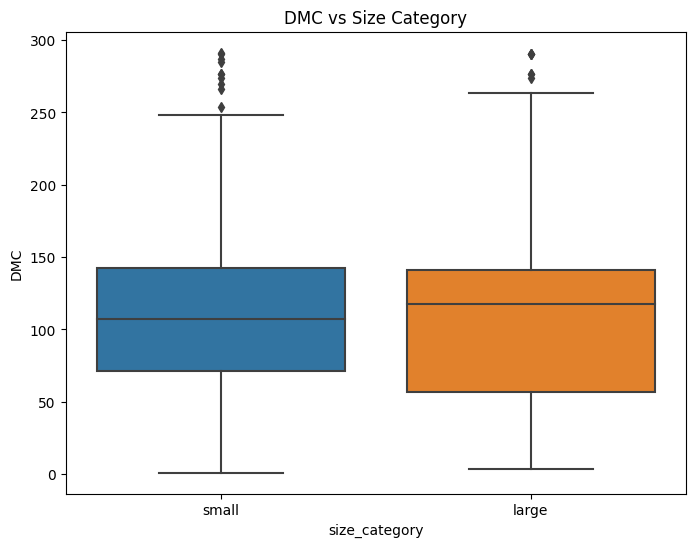

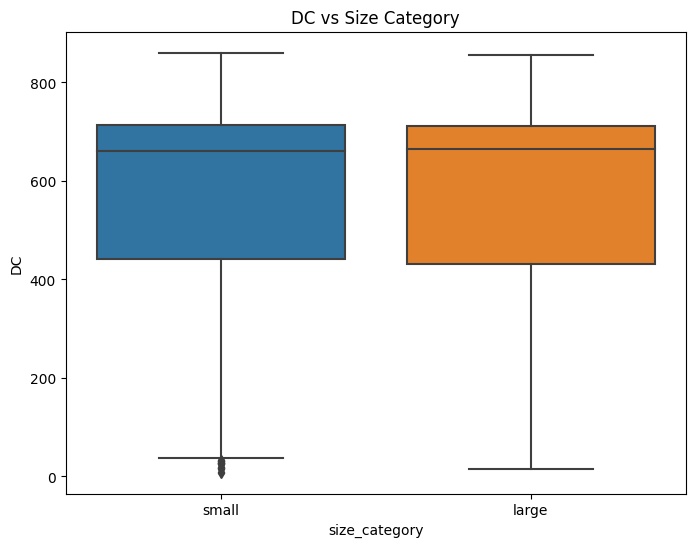

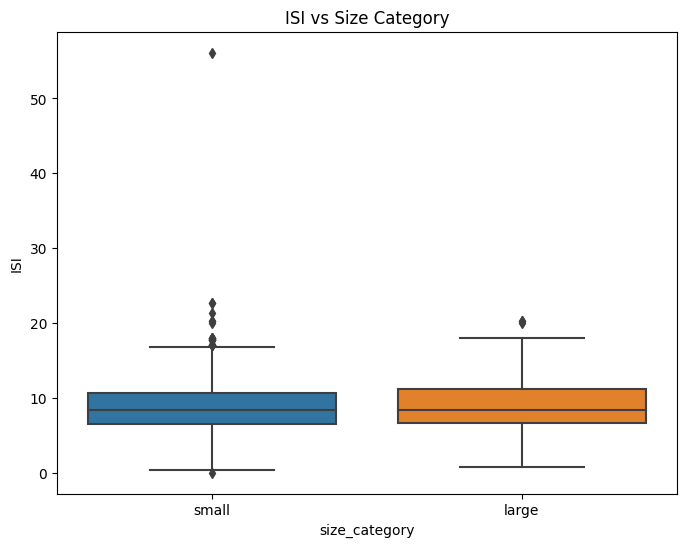

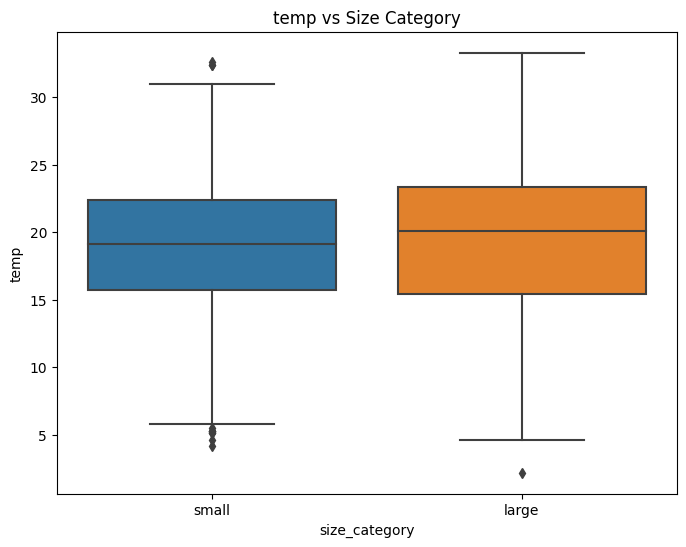

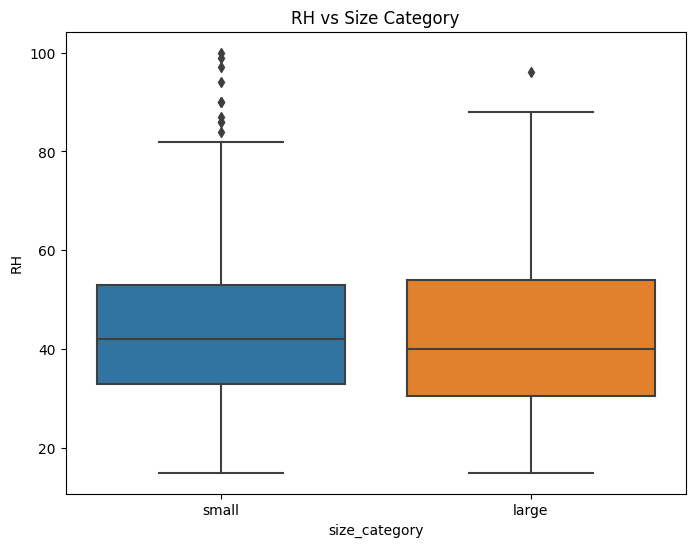

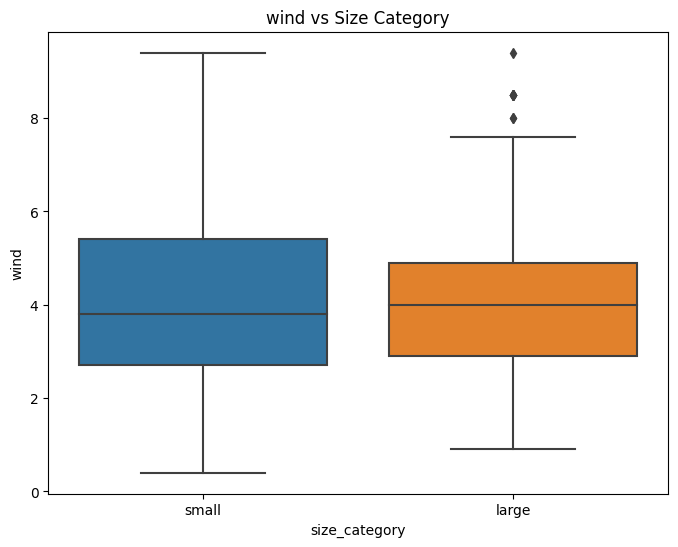

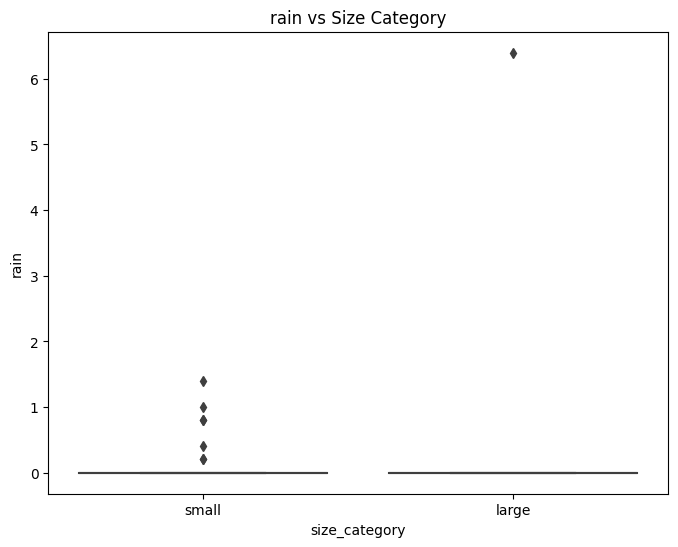

In [ ]:
numerical_features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='size_category', y=feature, data=data)
    plt.title(f'{feature} vs Size Category')
    plt.show()

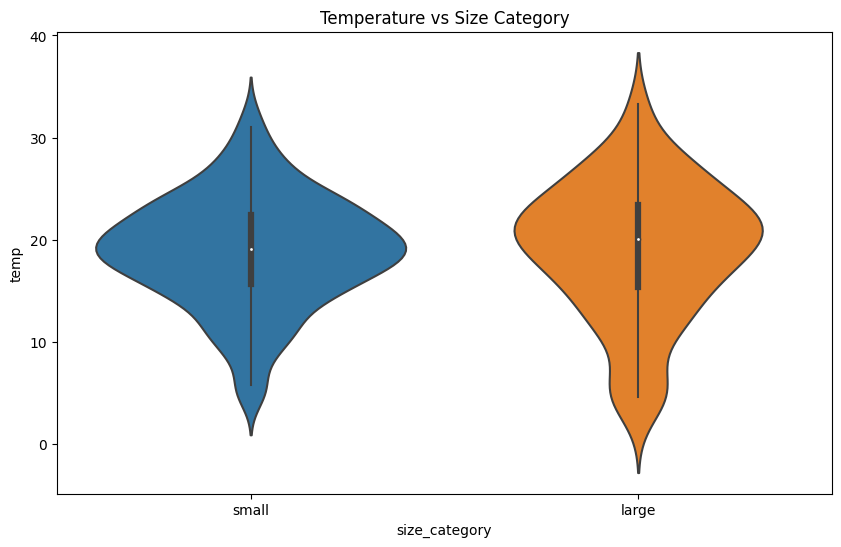

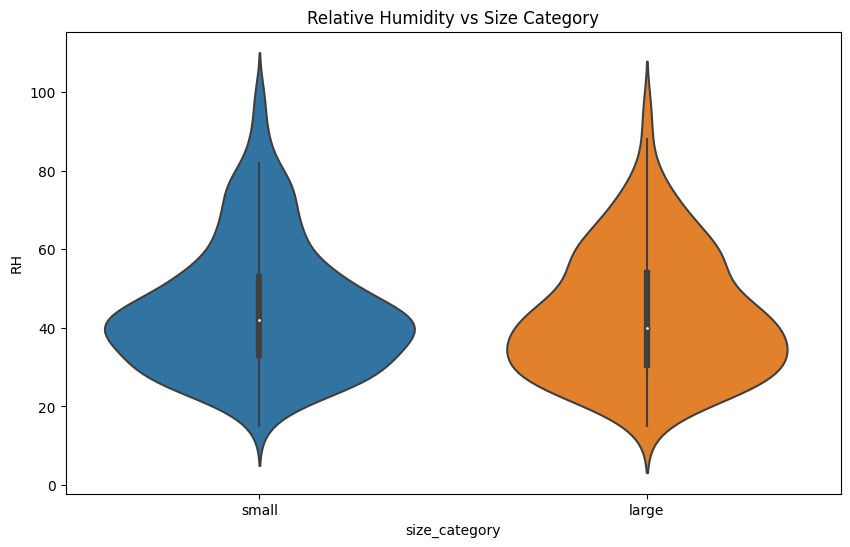

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='size_category', y='temp', data=data)
plt.title('Temperature vs Size Category')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='size_category', y='RH', data=data)
plt.title('Relative Humidity vs Size Category')
plt.show()

In [ ]:
label_encoder = LabelEncoder()
data['month'] = label_encoder.fit_transform(data['month'])
data['day'] = label_encoder.fit_transform(data['day'])

In [ ]:
X = data.drop(['size_category', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed'], axis=1)
y = data['size_category']

In [ ]:
y = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
11/11 [==============================] - 1s 27ms/step - loss: 1.0678 - accuracy: 0.2879 - val_loss: 0.8166 - val_accuracy: 0.3494
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 0.7409 - accuracy: 0.4970 - val_loss: 0.6306 - val_accuracy: 0.6506
Epoch 3/50
11/11 [==============================] - 0s 7ms/step - loss: 0.6316 - accuracy: 0.6818 - val_loss: 0.5611 - val_accuracy: 0.7831
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 0.5973 - accuracy: 0.7424 - val_loss: 0.5337 - val_accuracy: 0.7952
Epoch 5/50
11/11 [==============================] - 0s 4ms/step - loss: 0.5649 - accuracy: 0.7545 - val_loss: 0.5229 - val_accuracy: 0.7952
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 0.5376 - accuracy: 0.7667 - val_loss: 0.5150 - val_accuracy: 0.8193
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 0.5177 - accuracy: 0.7697 - val_loss: 0.5056 - val_accuracy: 0.8193
Epoch 8/50
11/11 [=

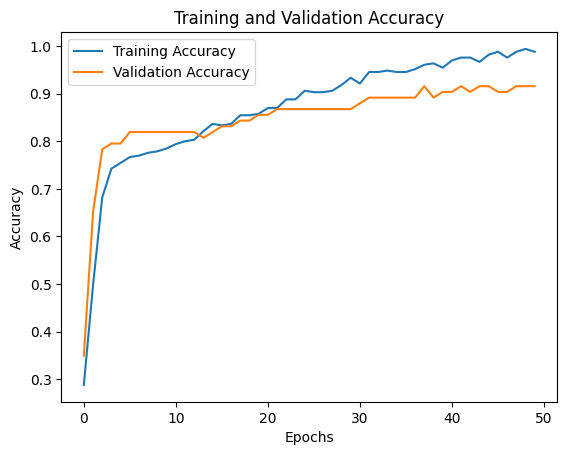

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred_encoded = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_encoded, axis=1)

4/4 [==============================] - 0s 3ms/step


In [ ]:
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

In [ ]:
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print('Accuracy:', accuracy)

Accuracy: 0.9134615384615384


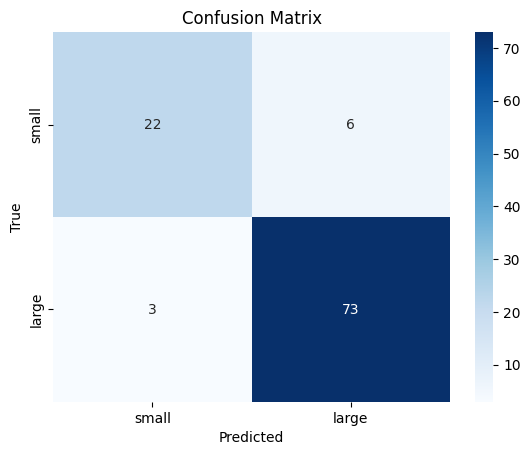

In [ ]:
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['small', 'large'], yticklabels=['small', 'large'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

classification_rep = classification_report(y_test_labels, y_pred_labels, target_names=['small', 'large'])
print(classification_rep)

              precision    recall  f1-score   support

       small       0.88      0.79      0.83        28
       large       0.92      0.96      0.94        76

    accuracy                           0.91       104
   macro avg       0.90      0.87      0.89       104
weighted avg       0.91      0.91      0.91       104



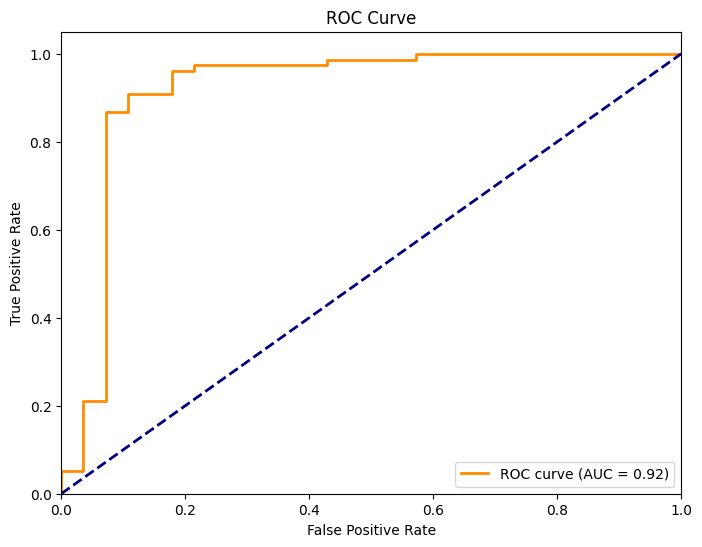

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_encoded[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

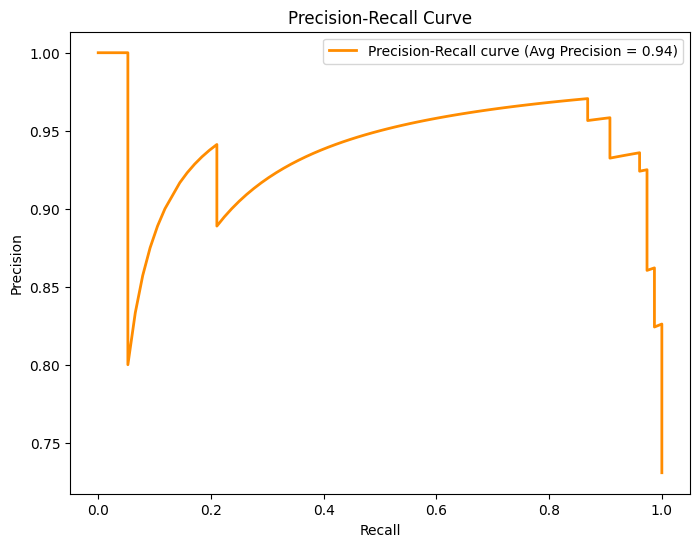

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_encoded[:, 1])
avg_precision = average_precision_score(y_test, y_pred_encoded[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (Avg Precision = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()